In [240]:
import pandas as pd

In [241]:
df=pd.read_csv("insurance.xls")

In [242]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h1>first we have to convert some columns into categorical form to either 0/1 so that they can easily be added into decision making</h1>

In [243]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

In [244]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int8

In [279]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<p>just checking if we have any null value, if yes then first fill missing value</p>

In [246]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

by using all the above variables/columns we want to predict charges

<pre><b>Simple linearregression</b>
<h3>y=mx+c
m is slope and c is intercept
The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis.</h3>
    <h1>Multi linear regression</h1>
   <b> Y=m1X1+m2X2+m3X3......+mnXn+C</b>
</pre>

now we are going to make training and test data so in training only starting 6 columns play roleso


In [247]:
X=df.drop(columns='charges')

In [248]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [249]:
Y=df['charges']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#random_state 0shows that each time your data set should be divided same when you rerun code if i take it 20 then each time training and testing data values will be different


In [252]:
x_train

,age,sex,bmi,children,smoker,region
1163,18,0,28.215,0,0,0
196,39,0,32.800,0,0,3
438,52,0,46.750,5,0,2
183,44,0,26.410,0,0,1
1298,33,1,27.455,2,0,1
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [253]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1261,28,1,37.100,1,0,3
494,21,1,25.700,4,1,3
97,55,1,38.280,0,0,2
418,64,1,39.160,1,0,2


In [254]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1261     3277.16100
494     17942.10600
97      10226.28420
418     14418.28040
920     13451.12200
Name: charges, Length: 402, dtype: float64

In [255]:
y_train

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 936, dtype: float64

In [256]:
print("x_train shape:",x_train.shape)
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (936, 6)
x_test shape: (402, 6)
y_train shape: (936,)
y_test shape: (402,)


In [257]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [258]:
lr.fit(x_train,y_train)

LinearRegression()

In [259]:
c=lr.intercept_
c

np.float64(-11827.733141795696)

In [260]:
m=lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [261]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

Text(0, 0.5, 'Predicted Charges')

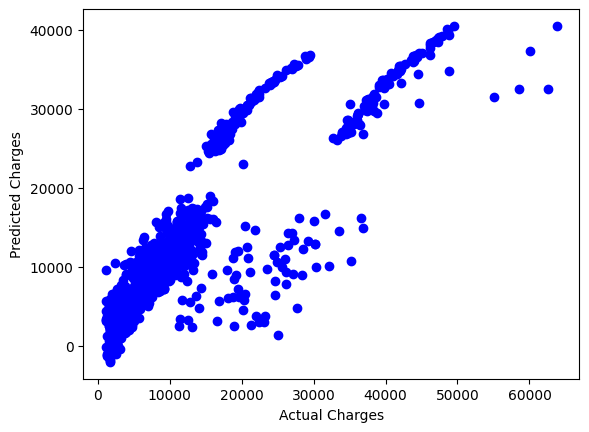

In [262]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted on training data
plt.scatter(y_train, y_pred_train, label="Training Data", color="blue")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

In [263]:
from sklearn.metrics import r2_score

In [264]:
r2_score(y_train,y_pred_train)#nearto 1 is good

0.7306840408360217

In [265]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [266]:
r2_score(y_test,y_pred_test)#nearto 1 is good

0.7911113876316933

In [267]:
# Predict the value for a new person
import numpy as np
X_new = np.array([[32,0,27.9,1,0,1]])  # Note the double brackets to make it 2D
y_pred = lr.predict(X_new)
y_pred

c:\Users\Abdur Raffay Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5765.27293147])

In [268]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt


# Load the Diabetes dataset from a CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print("Original Dataset:")
data

Original Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [269]:
# Encode the target variable (Outcome) using Label Encoding
label_encoder = LabelEncoder()
data['Outcome'] = label_encoder.fit_transform(data['Outcome'])

# Remove outliers using the Z-score method
z_scores = np.abs(stats.zscore(data.drop(columns=['Outcome'])))
data = data[(z_scores < 3).all(axis=1)]

In [270]:
# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data into features and target variable
X = scaled_data.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = scaled_data['Outcome']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [271]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.32520050060571026
Mean Squared Error: 0.15962884608124742


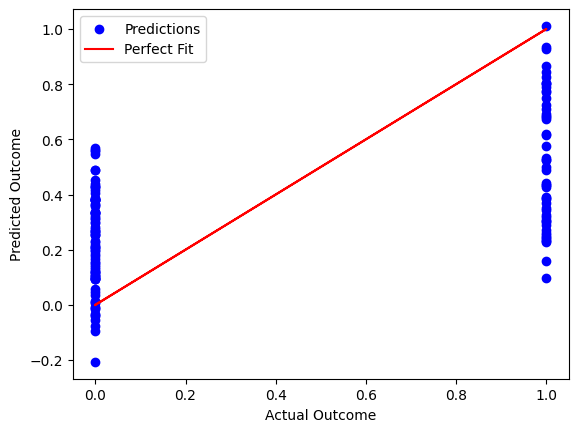

In [272]:
# Scatter plot to visualize the model
plt.scatter(y_test, y_pred, label="Predictions", color="blue")
plt.plot(y_test, y_test, color="red", label="Perfect Fit")
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.legend()
plt.show()

In [273]:
# Encode categorical features
# Use Label Encoding for binary categories and Ordinal Encoding for multi-class categories

label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

for column in data.select_dtypes(include=['object', 'category']).columns:
    unique_values = data[column].nunique()
    
    if unique_values == 2:  # Binary category
        data[column] = label_encoder.fit_transform(data[column])
    else:  # Multi-class category
        data[column] = ordinal_encoder.fit_transform(data[[column]])

In [274]:
# Pre-process the data
# Fill missing values with mean and forward fill
data.fillna(data.mean(), inplace=True)
data.fillna(method='ffill', inplace=True)

C:\Users\Abdur Raffay Khan\AppData\Local\Temp\ipykernel_19160\2532305328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)
C:\Users\Abdur Raffay Khan\AppData\Local\Temp\ipykernel_19160\2532305328.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Abdur Raffay Khan\AppData\Local\Temp\ipykernel_19160\2532305328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)


In [275]:
# Remove outliers using the Z-score method
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [276]:
# # Remove outliers using the IQR method
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [277]:
# Scale the data using Min-Max Scaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [278]:
# Split the data into features and target variable
X = scaled_data.drop('pulse', axis=1)  # Assume 'pulse' is the target variable
y = scaled_data['pulse']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['pulse'] not found in axis"

In [ ]:
# Fit the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.6411065692764721
Mean Squared Error: 0.5052061566701351


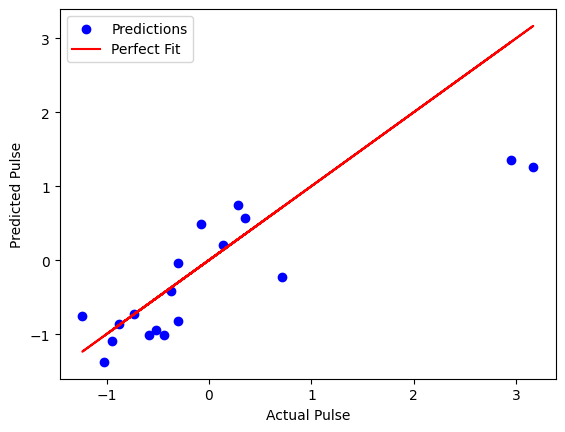

In [ ]:
# Scatter plot to visualize the model
plt.scatter(y_test, y_pred, label="Predictions", color="blue")
plt.plot(y_test, y_test, color="red", label="Perfect Fit")
plt.xlabel("Actual Pulse")
plt.ylabel("Predicted Pulse")
plt.legend()
plt.show()